In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#loading data
data = pd.read_csv("adult.csv").dropna()
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [3]:
#data clean up
#eventueel te verwijderen columnen: relationship, marital-status, (capital gain/loss idk wat is), 
print("Before clean up:",len(data))

dataExcluding = data[data['native-country'] != '?']
print("After removing '?' from 'native-country' column: ",len(dataExcluding))
df = dataExcluding

Before clean up: 48842
After removing '?' from 'native-country' column:  47985


In [4]:
#native country, education want education-num.
   
print(f"\nage range: {min(df.age)} to {max(df.age)}")
print(f"\npercentage >50k: {((df['income'] == '>50K').mean() * 100):.2f}%, <=50k: {((df['income'] == '<=50K').mean() * 100):.2f}%")
print(f"\nTotal >50k: {((df['income'] == '>50K').sum())}, <=50k: {((df['income'] == '<=50K').sum())}")
print(f"\npercentage White: {((df['race'] == 'White').mean() * 100):.2f}%, Black: {((df['race'] == 'Black').mean() * 100):.2f}%, Asian-Pac-Islander: {((df['race'] == 'Asian-Pac-Islander').mean() * 100):.2f}%, Amer-Indian-Eskimo: {((df['race'] == 'Amer-Indian-Eskimo').mean() * 100):.2f}%, Other: {((df['race'] == 'Other').mean() * 100):.2f}%")
print(f"\nTotal White: {((df['race'] == 'White').sum())}, Black: {((df['race'] == 'Black').sum())}, Asian-Pac-Islander: {((df['race'] == 'Asian-Pac-Islander').sum())}, Amer-Indian-Eskimo: {((df['race'] == 'Amer-Indian-Eskimo').sum())}, Other: {((df['race'] == 'Other').sum())}")
print(f"\npercentage Male: {((df['gender'] == 'Male').mean() * 100):.2f}%, Female: {((df['gender'] == 'Female').mean() * 100):.2f}%")
print(f"\nTotal Male: {((df['gender'] == 'Male').sum())}, Female: {((df['gender'] == 'Female').sum())}")

# Group df by education level
gender_groups = df.groupby('gender')
# income split by education levels
education_groups = df.groupby('education')
# income split by race
race_groups = df.groupby('race')

# Calculate percentage of people with income >50K and <=50K for each education level
percentage_greater_50k = education_groups['income'].apply(lambda x: (x == '>50K').mean() * 100)
percentage_less_equal_50k = education_groups['income'].apply(lambda x: (x == '<=50K').mean() * 100)
# Create an overview table
overview_df = pd.DataFrame({
    'Highest education Level': percentage_greater_50k.index,
    '>50K Percentage': percentage_greater_50k.values,
    '<=50K Percentage': percentage_less_equal_50k.values
})

# Print the overview table without numbers in front of the values
print(f"\n{overview_df.to_string(index=False)}")

# gender split by education levels
# Calculate percentage of people with income >50K and <=50K for each education level
percentage_male = education_groups['gender'].apply(lambda x: (x == 'Male').mean() * 100)
percentage_female = education_groups['gender'].apply(lambda x: (x == 'Female').mean() * 100)
# Create an overview table
overview_df = pd.DataFrame({
    'Highest education Level': percentage_male.index,
    'Male Percentage': percentage_male.values,
    'Female Percentage': percentage_female.values
})

# Print the overview table without numbers in front of the values
print(f"\n{overview_df.to_string(index=False)}")

# Calculate percentage of people with income >50K and <=50K for each education level
percentage_greater_50k = race_groups['income'].apply(lambda x: (x == '>50K').mean() * 100)
percentage_less_equal_50k = race_groups['income'].apply(lambda x: (x == '<=50K').mean() * 100)
# Create an overview table
overview_df = pd.DataFrame({
    'Race': percentage_greater_50k.index,
    '>50K Percentage': percentage_greater_50k.values,
    '<=50K Percentage': percentage_less_equal_50k.values
})
# Print the overview table without numbers in front of the values
print(f"\n{overview_df.sort_values(by='>50K Percentage', ascending=False).to_string(index=False)}")

# Calculate percentage of people with income >50K and <=50K for each education level
percentage_male = race_groups['gender'].apply(lambda x: (x == 'Male').mean() * 100)
percentage_female = race_groups['gender'].apply(lambda x: (x == 'Female').mean() * 100)
# Create an overview table
overview_df = pd.DataFrame({
    'Race': percentage_male.index,
    'Male Percentage': percentage_male.values,
    'Female Percentage': percentage_female.values
})

# Print the overview table without numbers in front of the values
print(f"\n{overview_df.to_string(index=False)}")

# Calculate percentage of people with income >50K and <=50K for each education level
percentage_greater_50k = gender_groups['income'].apply(lambda x: (x == '>50K').mean() * 100)
percentage_less_equal_50k = gender_groups['income'].apply(lambda x: (x == '<=50K').mean() * 100)
# Create an overview table
overview_df = pd.DataFrame({
    'Gender': percentage_greater_50k.index,
    '>50K Percentage': percentage_greater_50k.values,
    '<=50K Percentage': percentage_less_equal_50k.values
})
# Print the overview table
print(f"\n{overview_df.sort_values(by='>50K Percentage', ascending=False).to_string(index=False)}")



age range: 17 to 90

percentage >50k: 23.90%, <=50k: 76.10%

Total >50k: 11467, <=50k: 36518

percentage White: 85.84%, Black: 9.49%, Asian-Pac-Islander: 2.90%, Amer-Indian-Eskimo: 0.98%, Other: 0.80%

Total White: 41189, Black: 4553, Asian-Pac-Islander: 1391, Amer-Indian-Eskimo: 470, Other: 382

percentage Male: 66.77%, Female: 33.23%

Total Male: 32041, Female: 15944

Highest education Level  >50K Percentage  <=50K Percentage
                   10th         6.268222         93.731778
                   11th         5.055556         94.944444
                   12th         7.086614         92.913386
                1st-4th         3.333333         96.666667
                5th-6th         4.897959         95.102041
                7th-8th         6.337272         93.662728
                    9th         5.234899         94.765101
             Assoc-acdm        25.775807         74.224193
              Assoc-voc        25.368008         74.631992
              Bachelors        41.40

In [5]:
y_attr_names = data.columns.tolist()
X_data_numpy = data.to_numpy()
print(y_attr_names)
print(X_data_numpy[:2, :])

['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
[[25 'Private' 226802 '11th' 7 'Never-married' 'Machine-op-inspct'
  'Own-child' 'Black' 'Male' 0 0 40 'United-States' '<=50K']
 [38 'Private' 89814 'HS-grad' 9 'Married-civ-spouse' 'Farming-fishing'
  'Husband' 'White' 'Male' 0 0 50 'United-States' '<=50K']]


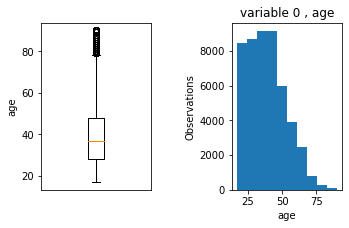

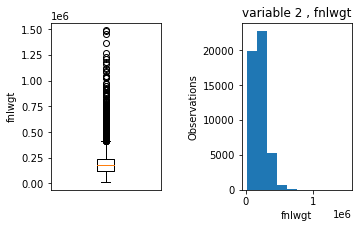

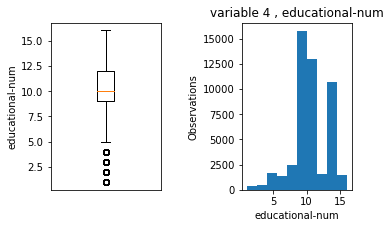

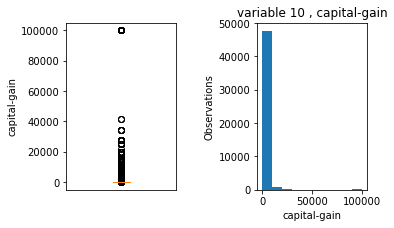

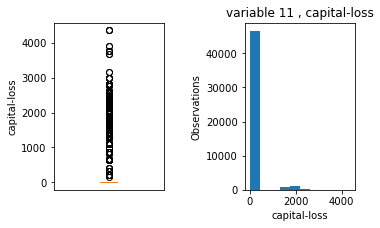

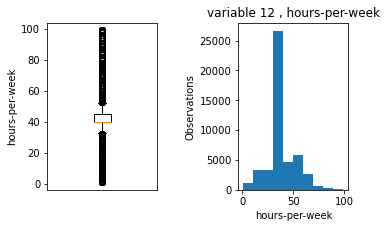

In [6]:
#data clean up
#eventueel te verwijderen columnen: relationship, marital-status, (capital gain/loss idk wat is), 
# print("Before clean up:",len(data))

# dataExcluding = df[data['native-country'] != '?']
# print("After removing '?' from 'native-country' column: ",len(dataExcluding))
# df = dataExcluding

numerical_variables = np.array(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week'])

indices_numerical_variables = np.where(np.isin(y_attr_names, numerical_variables))[0]  # indices where numerical_variables coincide with y_attr_names
for i in range(indices_numerical_variables.size):
    f, (boxp, histo) = plt.subplots(1,2)
    f.tight_layout(pad=5.0)
    boxp.boxplot(X_data_numpy[:, indices_numerical_variables[i]])
    boxp.xaxis.set_visible(False)
    boxp.set(ylabel = "{}".format(numerical_variables[i]))
    plt.title("variable {} , {}".format(indices_numerical_variables[i], numerical_variables[i]))
    histo.hist(X_data_numpy[:, indices_numerical_variables[i]])
    plt.xlabel("{}".format(numerical_variables[i]))
    plt.ylabel("Observations")
#     plt.savefig("variable_{}_{}.png".format(indices_numerical_variables[i], numerical_variables[i])) save as png

plt.show()

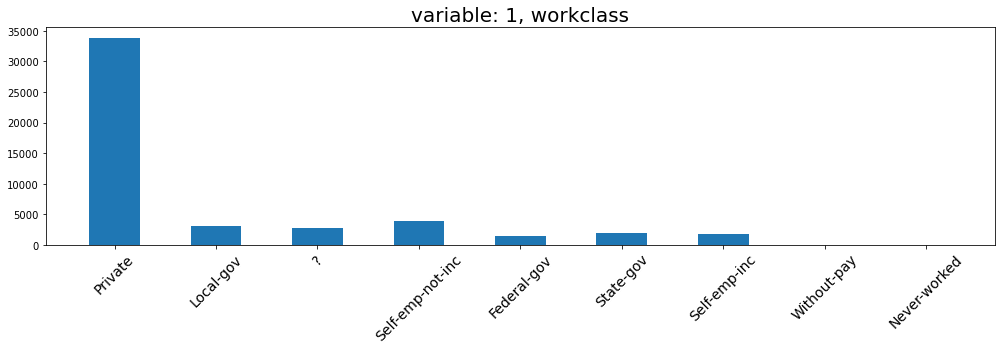

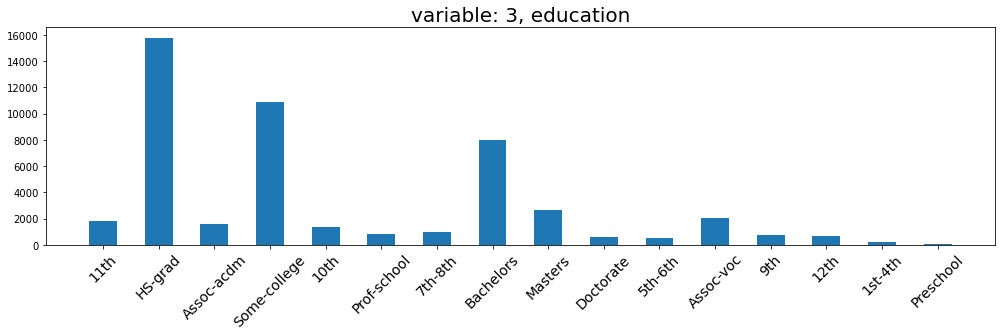

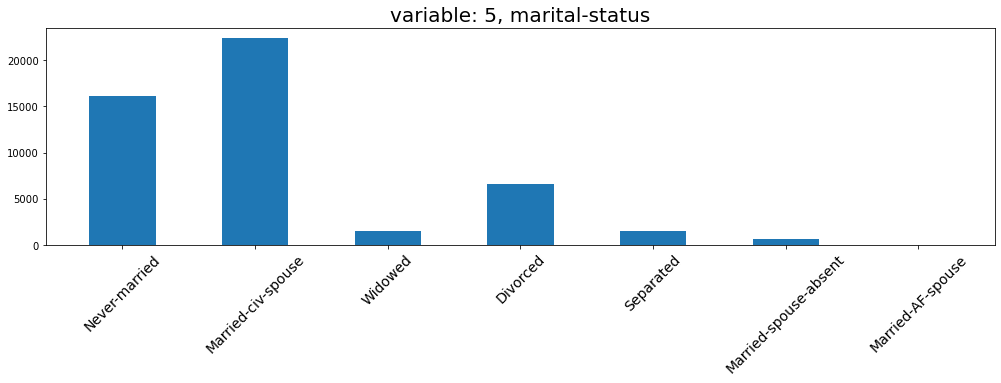

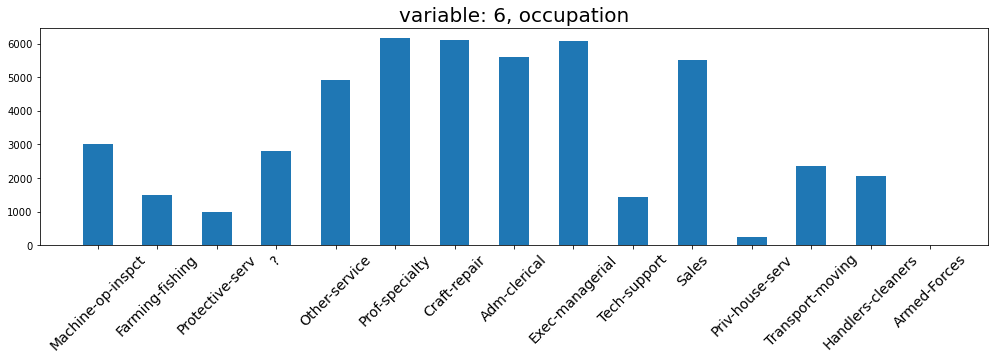

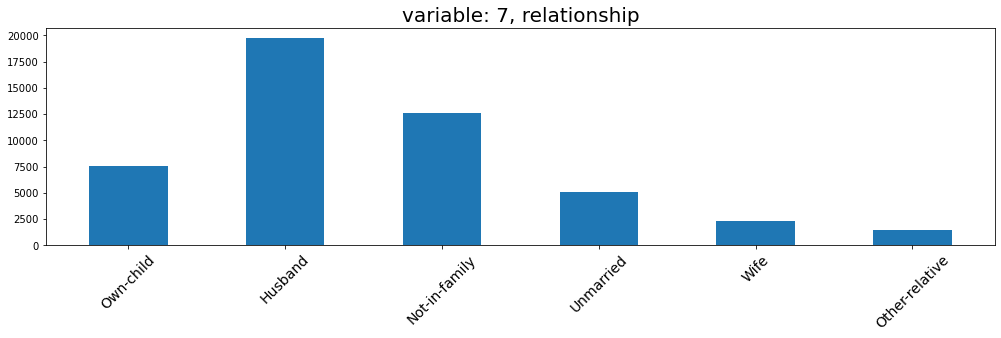

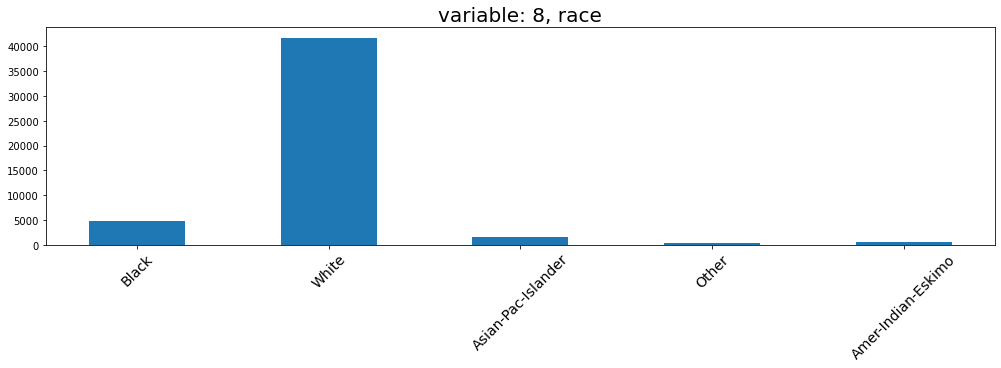

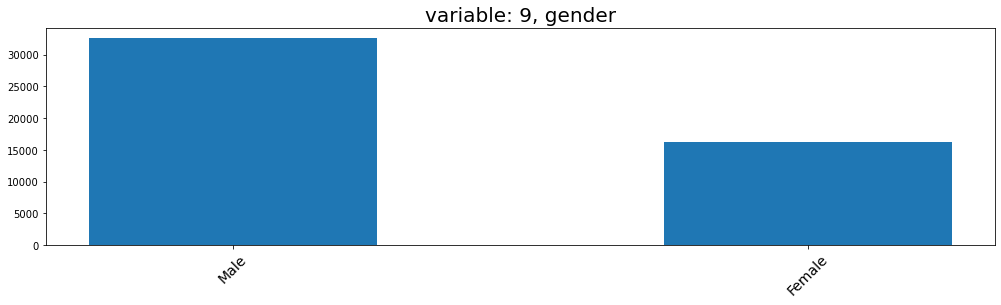

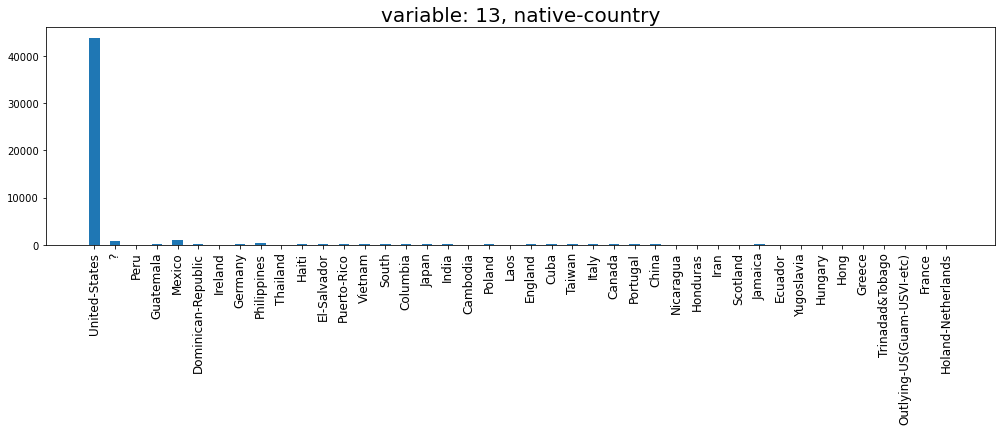

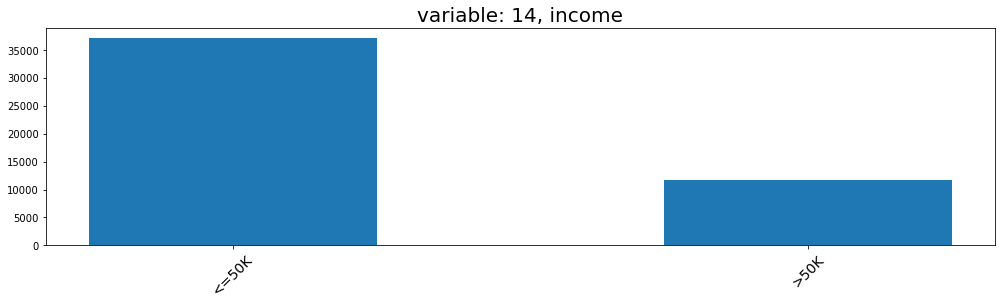

In [7]:
from collections import Counter

categorical_variables = np.array(['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income'])

indices_categorical_variables = np.where(np.isin(y_attr_names, categorical_variables))[0]

for i in range(indices_categorical_variables.size) :
    counter = Counter(X_data_numpy[:, indices_categorical_variables[i]])
    categories = list(counter.keys())
    values = list(counter.values())
    plt.tight_layout
    fig = plt.figure(figsize=(17,4))
    plt.bar(categories, values, width = 0.5)
    plt.title("variable: {}, {}".format(indices_categorical_variables[i], categorical_variables[i]), fontsize=20)
    if (categorical_variables[i] == 'native-country') :
        plt.xticks(rotation=90, fontsize=12)
    else :
        plt.xticks(rotation=45, fontsize=14)
#     plt.savefig("variable_{}_{}.png".format(indices_categorical_variables[i], categorical_variables[i]), bbox_inches='tight')
    plt.show()

# Variables used for both Adaboost and RandomForest
This also contains same data, and data splits.<br>
To ensure fairness in the comparison between RandomForest and Adaboost classifiers, only variables common to both algorithms are considered for a comprehensive and unbiased evaluation.

In [8]:
#imports
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV # used K-folds algorithm, and grid search
from sklearn.tree import DecisionTreeClassifier # Used for Adaboost
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier # Adaboost & RandomForest algorithms
# #data
# X = df.drop('income', axis=1)
# y = df['income']

# # Convert categorical variables to numerical
# X = pd.get_dummies(X)
data = pd.read_csv("adult.csv")
y = data.iloc[:, -1]
data = data.iloc[:, :-1]
data = pd.get_dummies(data, columns=categorical_variables[:-1])

y_attr_names = data.columns.tolist()
X = data.to_numpy()
print(X_data_numpy.shape)

for i in range(0, y.size) :
    if y[i] == '>50K' :
        y[i] = 1
    else :
        y[i] = 0
        
y = y.astype(int)
y = y.to_numpy()
print(y)



# classifier variables
# hyper_params = {
#     'n_estimators': [10, 50, 100, 150, 200],
#     'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25]
# }

#test vars for function
hyper_params = {
    'n_estimators': [1],
    'max_depth': [1]
}
# Variables to store the best results for both 5k and 10k folds
best_results = {
    "ada": {
        "classifier": None, "accuracy": 0, "X_train": None, "y_train": None, "X_test": None, "y_test": None, "y_pred": None
    },
    "rf": {
        "classifier": None, "accuracy": 0, "X_train": None, "y_train": None, "X_test": None, "y_test": None, "y_pred": None
    }
}
# Accuracy values for each fold
accuracy_ada_list = []
accuracy_rf_list = []

(48842, 15)
[0 0 1 ... 0 0 1]


In [9]:
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay # To plot ConfusionMatrix, ROC and calculate accuracy score
import matplotlib.pyplot as plt

# Function to check if new value is better than old value max_depth and n_estimators is not a var, can be extracted from the classifiers
def update_best_results(algorithm, classifier, accuracy, X_train, y_train, X_test, y_test, y_pred):
    if accuracy > best_results[algorithm]["accuracy"]:
        best_results[algorithm]["classifier"] = classifier
        best_results[algorithm]["accuracy"] = accuracy
        best_results[algorithm]["X_train"] = X_train
        best_results[algorithm]["y_train"] = y_train
        best_results[algorithm]["X_test"] = X_test
        best_results[algorithm]["y_test"] = y_test
        best_results[algorithm]["y_pred"] = y_pred

# Function to create confusion matrix
def createConfusionMatrix(y_test, y_pred, name, max_depth, n_estimators):
    cm = confusion_matrix(y_test, y_pred)
    # Set the display labels and title
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
    display.plot(cmap='Blues', values_format='d', ax=plt.gca())  # You can customize the colormap and format

    # Add a title
    plt.title(f"Confusion Matrix for {name} with max_depth: {max_depth} and n_estimators: {n_estimators}")

    # Show the plot
    plt.show()

    
def createROC(best_ada_classifier, best_rf_classifier, X_test, y_test):
    #Calculate for Ada
    y_scores_ada = best_ada_classifier.predict_proba(X_test)[:, 1]
    fpr_ada, tpr_ada, _ = roc_curve(y_test, y_scores_ada)
    
    #Calculate for RF
    y_scores_rf = best_rf_classifier.predict_proba(X_test)[:, 1]
    fpr_rf, tpr_rf, _ = roc_curve(y_test, y_scores_rf)
    
    plt.figure(figsize=(8, 8))
    plt.plot(fpr_ada, tpr_ada, lw=2, label=f"ada ROC curve with max_depth: {best_ada_classifier.base_estimator_.max_depth} and n_estimators: {best_ada_classifier.n_estimators}", color="red")
    plt.plot(fpr_rf, tpr_rf, lw=2, label=f"rf ROC curve with max_depth: {best_rf_classifier.max_depth} and n_estimators: {best_rf_classifier.n_estimators}", color="blue")    
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('(ROC) Curves')
    plt.legend(loc='lower right')
    plt.show()

    
# Function to print all info
def printInfo(X_train, y_train, X_test, y_test, y_pred_ada, y_pred_rf, best_ada_classifier, best_rf_classifier):
    createROC(best_ada_classifier, best_rf_classifier, X_test, y_test)
    createConfusionMatrix(y_test, y_pred_ada, "AdaBoost", best_ada_classifier.base_estimator_.max_depth, best_ada_classifier.n_estimators)
    createConfusionMatrix(y_test, y_pred_rf, "RandomForest", best_rf_classifier.max_depth, best_rf_classifier.n_estimators)

In [10]:

# Variables for k-folds and 80/20 split for train/test and verify
random_state = 123
k_fold_splits = 10

# Split the data into 80% training & testing and 20% verifying
X_k_fold, X_verify, y_k_fold, y_verify = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Print the shape of the training and testing sets
print(f"K-fold set shape: X_k_fold={X_k_fold.shape}, y_k_fold={y_k_fold.shape}")
print(f"Verifying set shape: X_verify={X_verify.shape}, y_verify={y_verify.shape}\n")

#k-folds preperation
skf = StratifiedKFold(n_splits = k_fold_splits, shuffle = True, random_state = random_state)

K-fold set shape: X_k_fold=(39073, 108), y_k_fold=(39073,)
Verifying set shape: X_verify=(9769, 108), y_verify=(9769,)



Fold 1 of 10


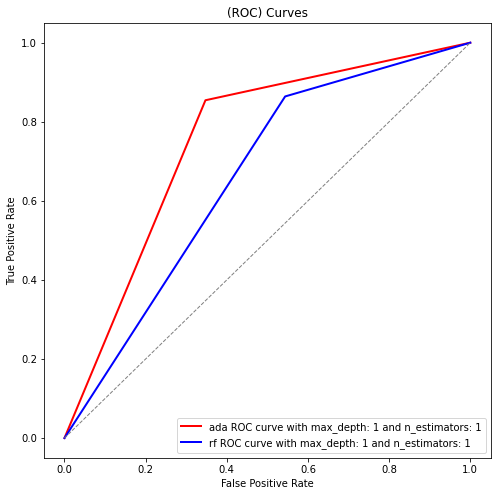

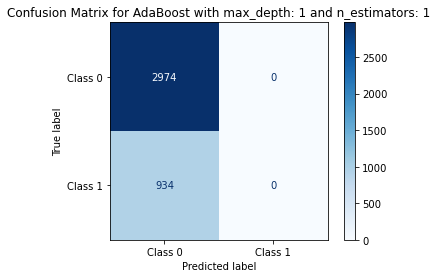

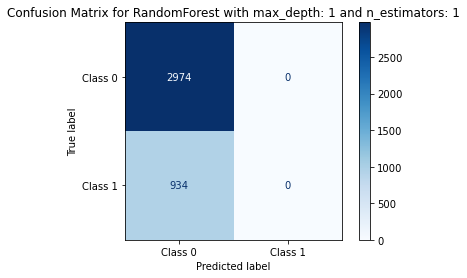

Fold 2 of 10


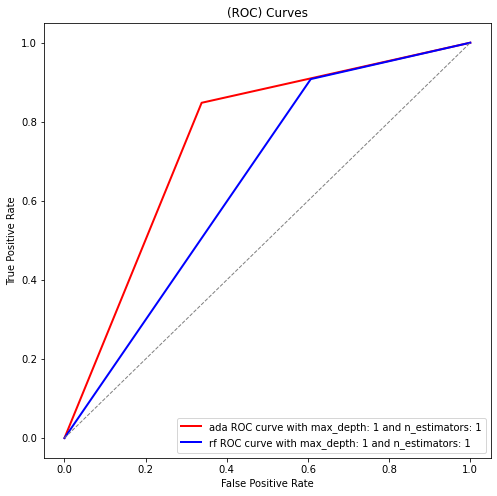

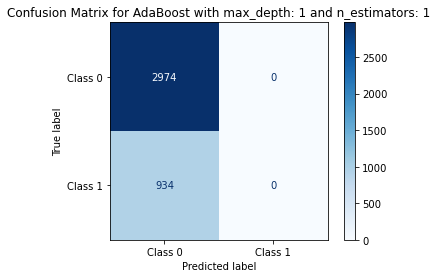

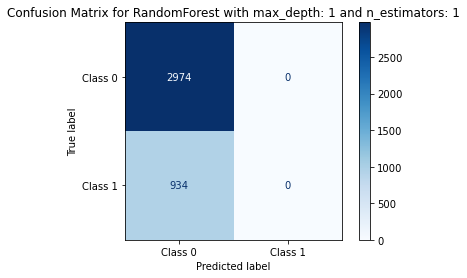

Fold 3 of 10


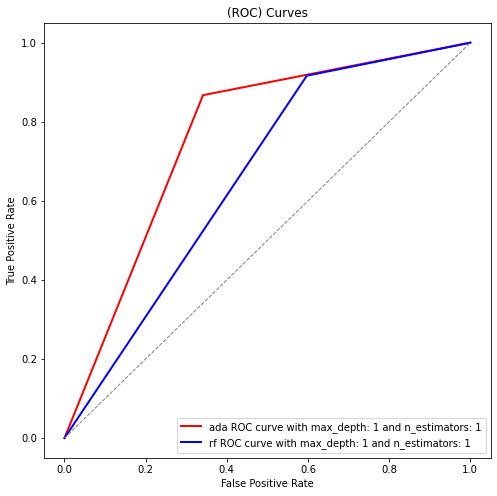

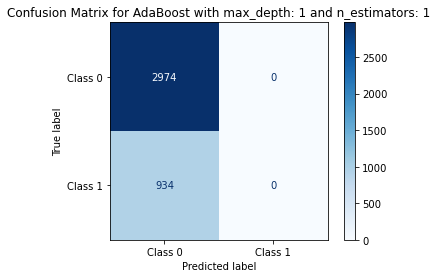

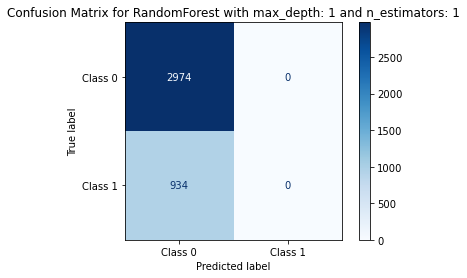

Fold 4 of 10


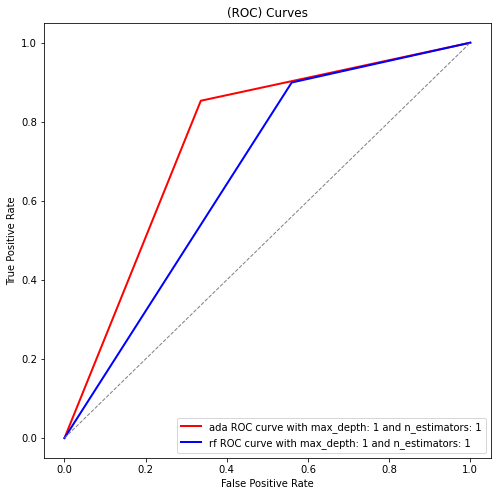

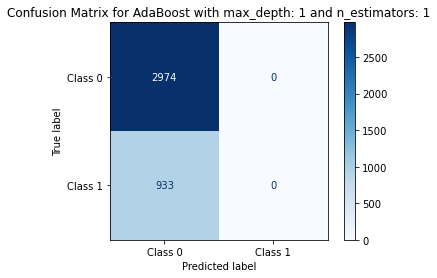

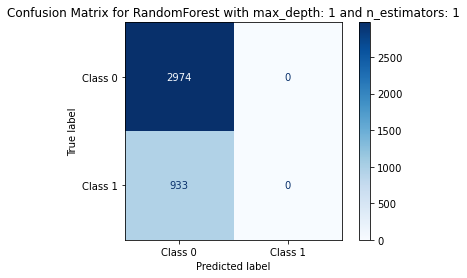

Fold 5 of 10


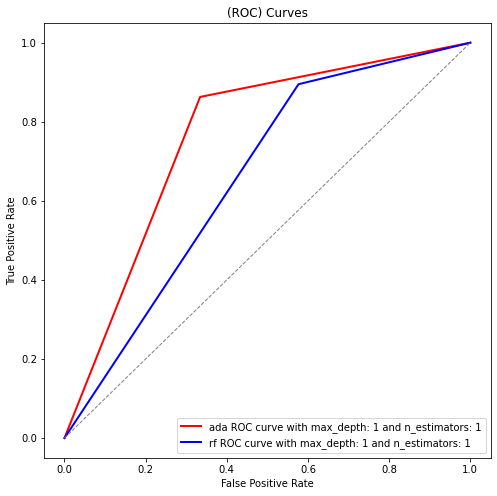

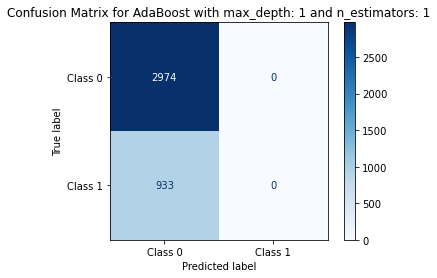

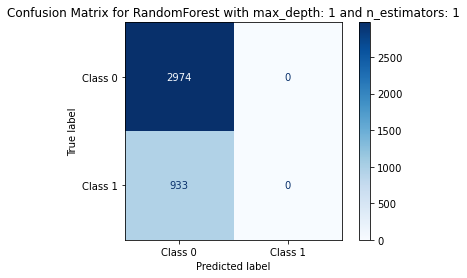

Fold 6 of 10


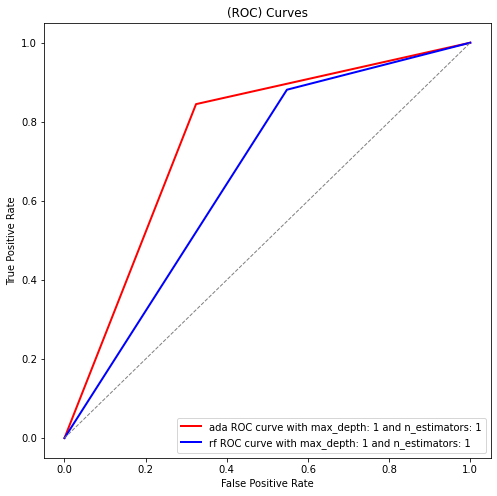

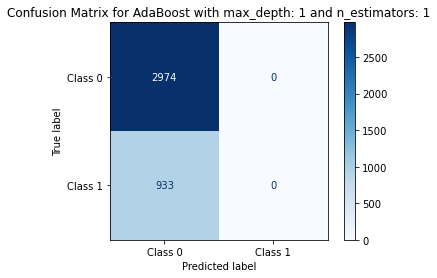

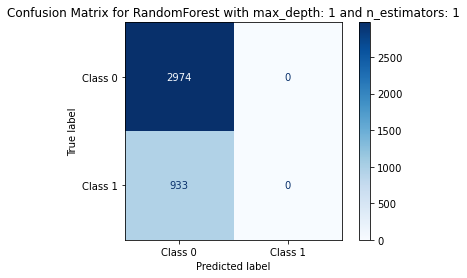

Fold 7 of 10


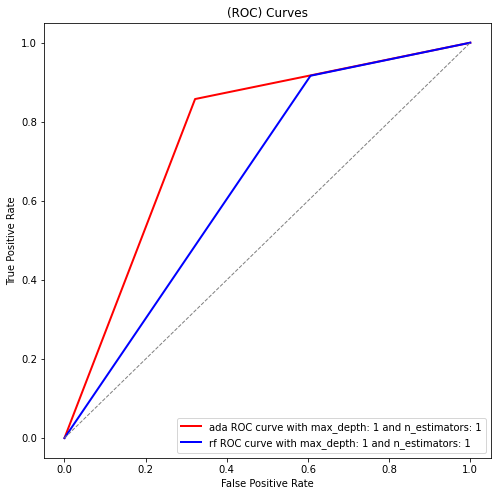

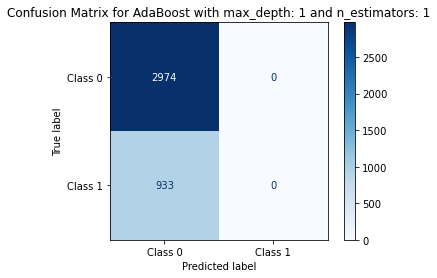

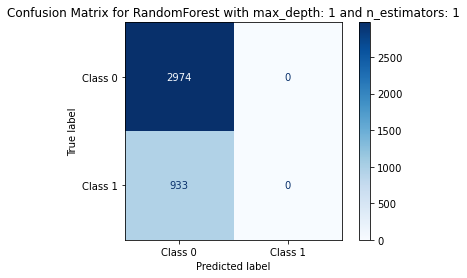

Fold 8 of 10


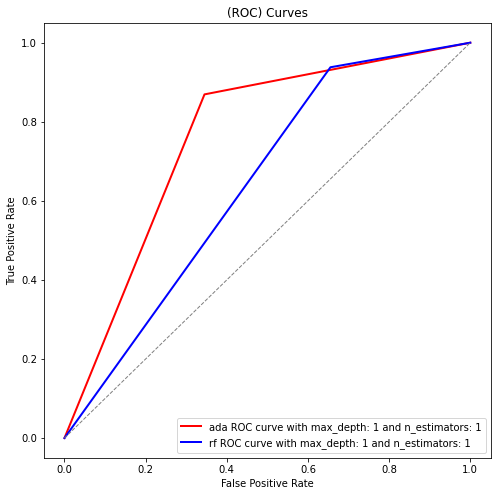

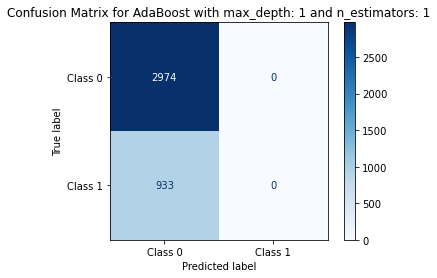

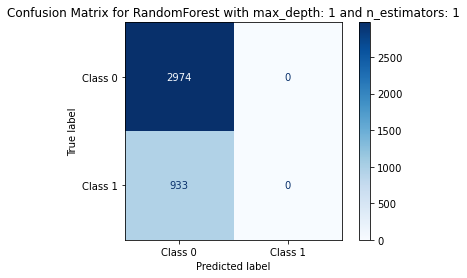

Fold 9 of 10


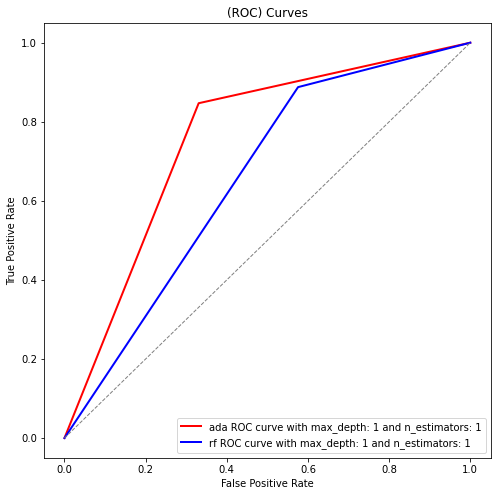

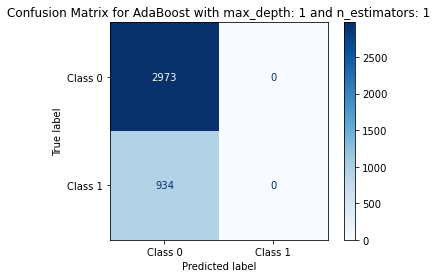

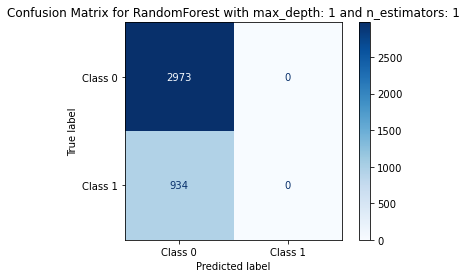

Fold 10 of 10


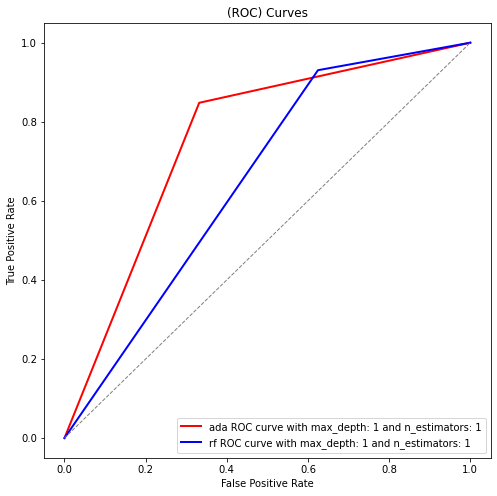

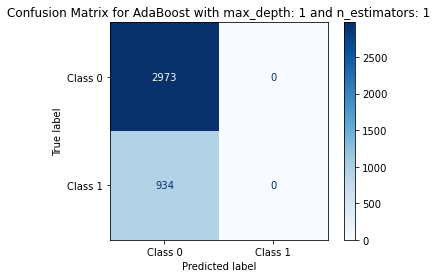

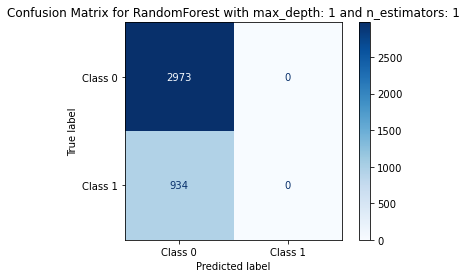

In [17]:
for fold_number, (train_index, test_index) in enumerate(skf.split(X_k_fold, y_k_fold), start=1):
    print(f"Fold {fold_number} of {k_fold_splits}")
    
    X_train, X_test = X_k_fold[train_index], X_k_fold[test_index]
    y_train, y_test = y_k_fold[train_index], y_k_fold[test_index]
        
    # rf classifier also included since rfclassifier can use in grid search but ada cant
    for i in hyper_params["max_depth"]:
        # AdaBoost
        base_classifier_ada = DecisionTreeClassifier(max_depth=i, random_state=random_state)
        ada_classifier = AdaBoostClassifier(base_classifier_ada, random_state=random_state)
        
        grid_search_ada = GridSearchCV(ada_classifier, {'n_estimators': hyper_params['n_estimators']}, cv=3, n_jobs=-1)
        grid_search_ada.fit(X_train, y_train)
        
        best_ada_classifier = grid_search_ada.best_estimator_
        y_pred_ada = best_ada_classifier.predict(X_test)
        accuracy_ada = accuracy_score(y_test, y_pred_ada)
        accuracy_ada_list.append(accuracy_ada)
        
        update_best_results("ada", best_ada_classifier, accuracy_ada, X_train, y_train, X_test, y_test, y_pred_ada)
       
        # Random Forest
        rf_classifier = RandomForestClassifier(max_depth=i, random_state=random_state)
        grid_search_rf = GridSearchCV(rf_classifier, {'n_estimators': hyper_params['n_estimators']}, cv=3, n_jobs=-1)
        grid_search_rf.fit(X_train, y_train)
        best_rf_classifier = grid_search_rf.best_estimator_
        y_pred_rf = best_rf_classifier.predict(X_test)
        accuracy_rf = accuracy_score(y_test, y_pred_rf)
        accuracy_rf_list.append(accuracy_rf)

        # Update best Random Forest results
        update_best_results("rf", best_rf_classifier, accuracy_rf, X_train, y_train, X_test, y_test, y_pred_rf)
        # Print results of iteration
        printInfo(X_train, y_train, X_test, y_test, y_pred_ada, y_pred_rf, best_ada_classifier, best_rf_classifier)

In [18]:
# Print average accuracies over all folds
print(f'AdaBoost Average Accuracy: {sum(accuracy_ada_list) / len(accuracy_ada_list)}')
print(f'Random Forest Average Accuracy: {sum(accuracy_rf_list) / len(accuracy_rf_list)}')

# Print the best results for 10k-folds
print('\nBest AdaBoost Result:')
print(f'Classifier: {best_results["ada"]["classifier"]}, n_estimators={str(best_results["ada"]["classifier"].n_estimators)},\nAccuracy: {best_results["ada"]["accuracy"]}\n')

print('Best Random Forest Result:')
print(f'Classifier: {best_results["rf"]["classifier"]}\nAccuracy: {best_results["rf"]["accuracy"]}\n')

print(f"The algorithm has conducted {len(accuracy_ada_list)*5} iterations on the dataset,\n"+
"saving the best accuracy score for each n_estimators within the fold.\n"+
f"This process has yielded a total of {len(accuracy_ada_list)} distinct accuracy scores.\n")

rf_sorted = sorted(accuracy_rf_list, reverse=True)
ada_sorted = sorted(accuracy_ada_list, reverse=True)

print("All accuracy scores high to low")

for i, item in enumerate(ada_sorted):
    rf_item = rf_sorted[i] if i < len(rf_sorted) else "N/A"
    print(f"ada: {item}, rf: {rf_item}")

AdaBoost Average Accuracy: 0.7609957283227595
Random Forest Average Accuracy: 0.7609957283227595

Best AdaBoost Result:
Classifier: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=123),
                   n_estimators=1, random_state=123), n_estimators=1,
Accuracy: 0.7611978500127975

Best Random Forest Result:
Classifier: RandomForestClassifier(max_depth=1, n_estimators=1, random_state=123)
Accuracy: 0.7611978500127975

The algorithm has conducted 200 iterations on the dataset,
saving the best accuracy score for each n_estimators within the fold.
This process has yielded a total of 40 distinct accuracy scores.

All accuracy scores high to low
ada: 0.7611978500127975, rf: 0.7611978500127975
ada: 0.7611978500127975, rf: 0.7611978500127975
ada: 0.7611978500127975, rf: 0.7611978500127975
ada: 0.7611978500127975, rf: 0.7611978500127975
ada: 0.7611978500127975, rf: 0.7611978500127975
ada: 0.761197850

In [13]:
from sklearn.tree import plot_tree # To plot decesion tree

# Re-Print functions for best ROC, CM and decision tree of 10k
def createBestROC(best_ada_classifier, X_test_ada, y_test_ada, best_rf_classifier, X_test_rf, y_test_rf):
    #Calculate for Ada
    y_scores_ada = best_ada_classifier.predict_proba(X_test_ada)[:, 1]
    fpr_ada, tpr_ada, _ = roc_curve(y_test_ada, y_scores_ada)
    
    #Calculate for RF
    y_scores_rf = best_rf_classifier.predict_proba(X_test_rf)[:, 1]
    fpr_rf, tpr_rf, _ = roc_curve(y_test_rf, y_scores_rf)
    
    plt.figure(figsize=(8, 8))
    plt.plot(fpr_ada, tpr_ada, lw=2, label=f"ada ROC curve with max_depth: {best_ada_classifier.base_estimator_.max_depth} and n_estimators: {best_ada_classifier.n_estimators}", color="red")
    plt.plot(fpr_rf, tpr_rf, lw=2, label=f"rf ROC curve with max_depth: {best_rf_classifier.max_depth} and n_estimators: {best_rf_classifier.n_estimators}", color="blue")    
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Best (ROC) Curves')
    plt.legend(loc='lower right')
    plt.show()


def createDecisionTree(classifier, X_train, y_train, name):
    plt.figure(figsize=(20, 10))
    if(name == "AdaBoost"):
        plot_tree(classifier.base_estimator_.fit(X_train, y_train), filled=True, feature_names=None, class_names=None)
        plt.title(f"Best Decision Tree Visualization - AdaBoost with max_depth: {classifier.base_estimator_.max_depth} and n_estimators: {classifier.n_estimators}")
    else:
        plot_tree(classifier.estimators_[0].fit(X_train, y_train), filled=True, feature_names=None, class_names=None)
        plt.title(f"Best Decision Tree Visualization - Random Forest with max_depth: {best_rf_classifier.max_depth} and n_estimators: {best_rf_classifier.n_estimators}")
    plt.show()

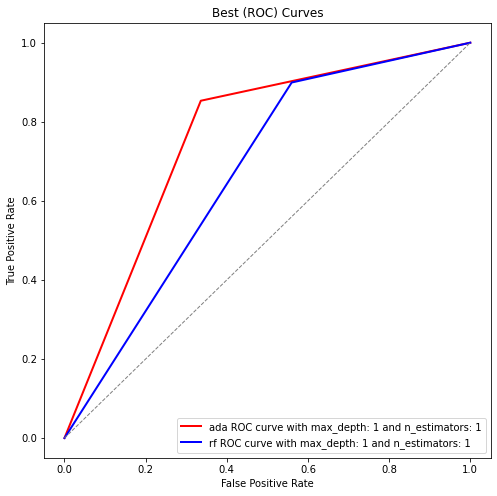

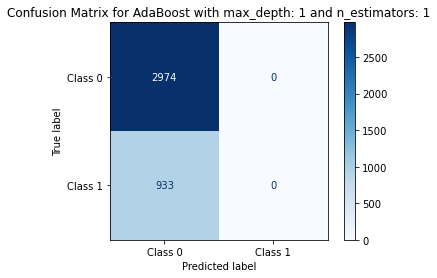

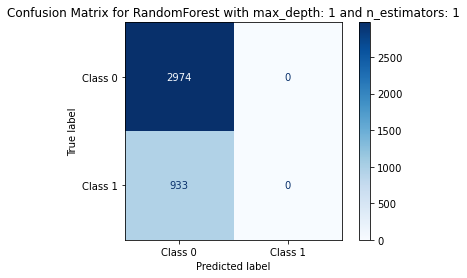

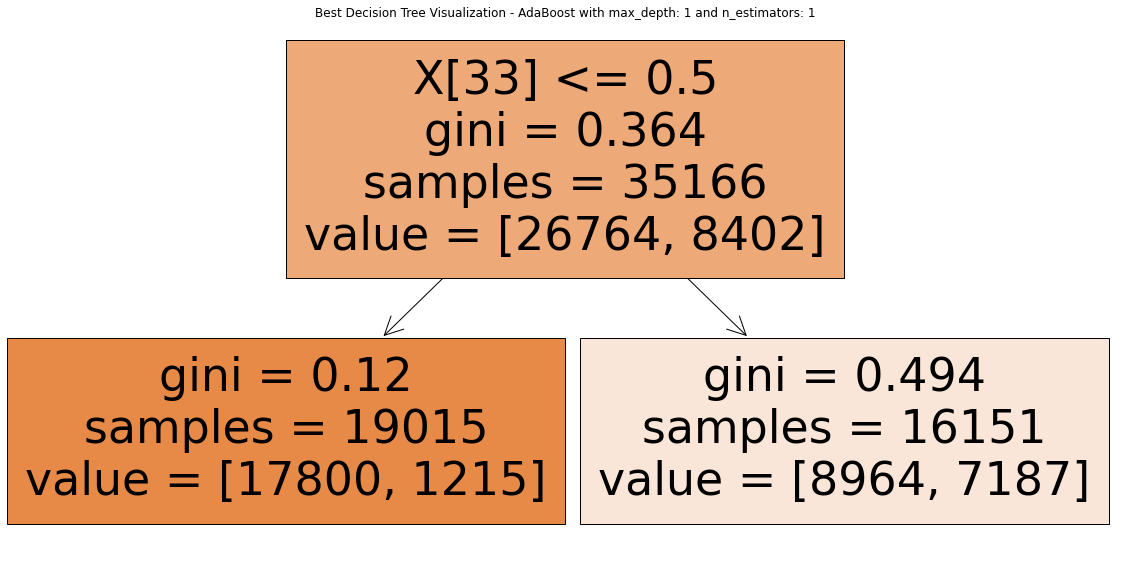

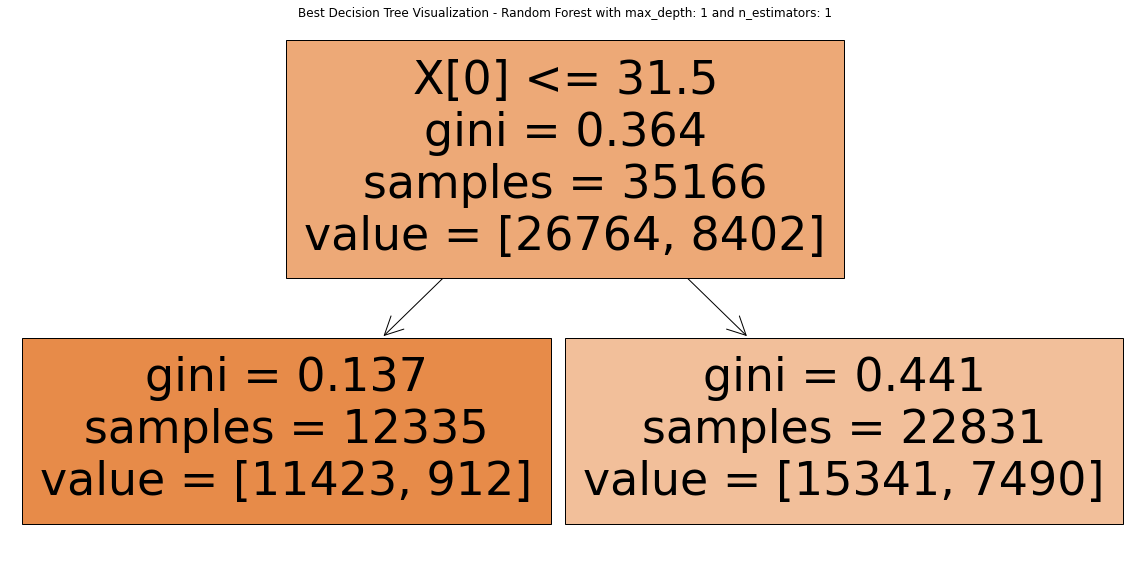

In [14]:
best_ada = best_results["ada"]
best_ada_max_depth = best_ada["classifier"].base_estimator_.max_depth
best_ada_n_estimators = best_ada["classifier"].n_estimators
best_rf = best_results["rf"]
best_rf_max_depth = best_rf["classifier"].max_depth
best_rf_n_estimators = best_rf["classifier"].n_estimators


createBestROC(best_ada["classifier"], best_ada["X_test"], best_ada["y_test"], best_rf["classifier"], best_rf["X_test"], best_rf["y_test"])
createConfusionMatrix(best_ada["y_test"], best_ada["y_pred"], "AdaBoost", best_ada_max_depth, best_ada_n_estimators)
createConfusionMatrix(best_rf["y_test"], best_rf["y_pred"], "RandomForest", best_rf_max_depth, best_rf_n_estimators)
createDecisionTree(best_ada["classifier"], best_ada["X_train"], best_ada["y_train"], "AdaBoost")
createDecisionTree(best_rf["classifier"], best_rf["X_train"], best_rf["y_train"], "RandomForest")

AdaBoost accuracy: 0.7592384072064694
RandomForest accuracy: 0.7592384072064694


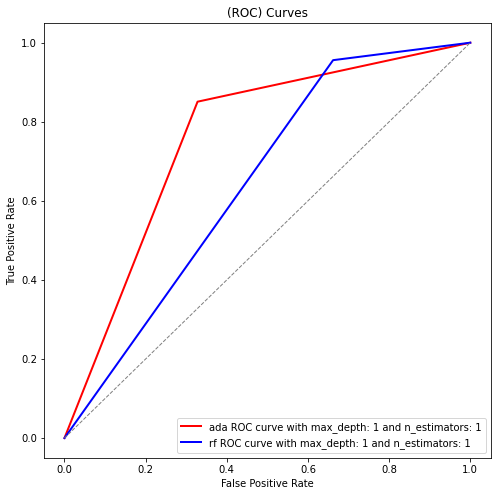

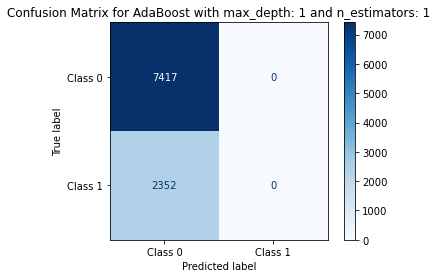

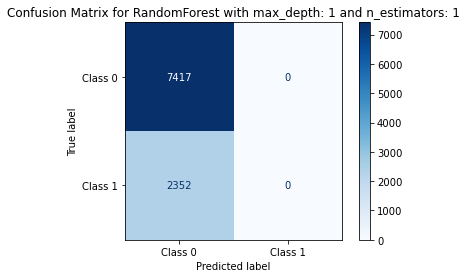

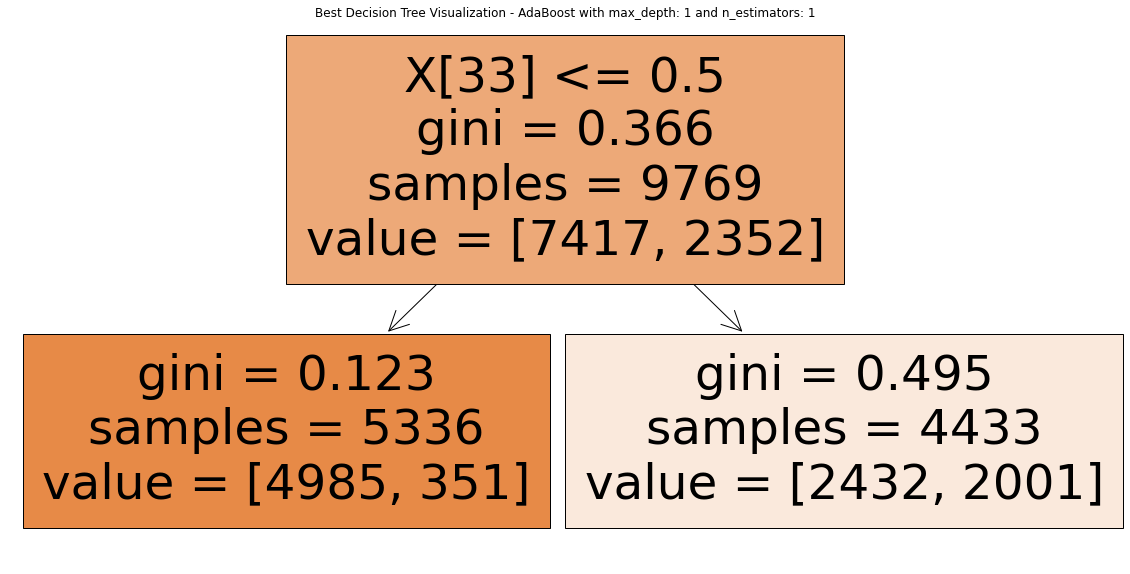

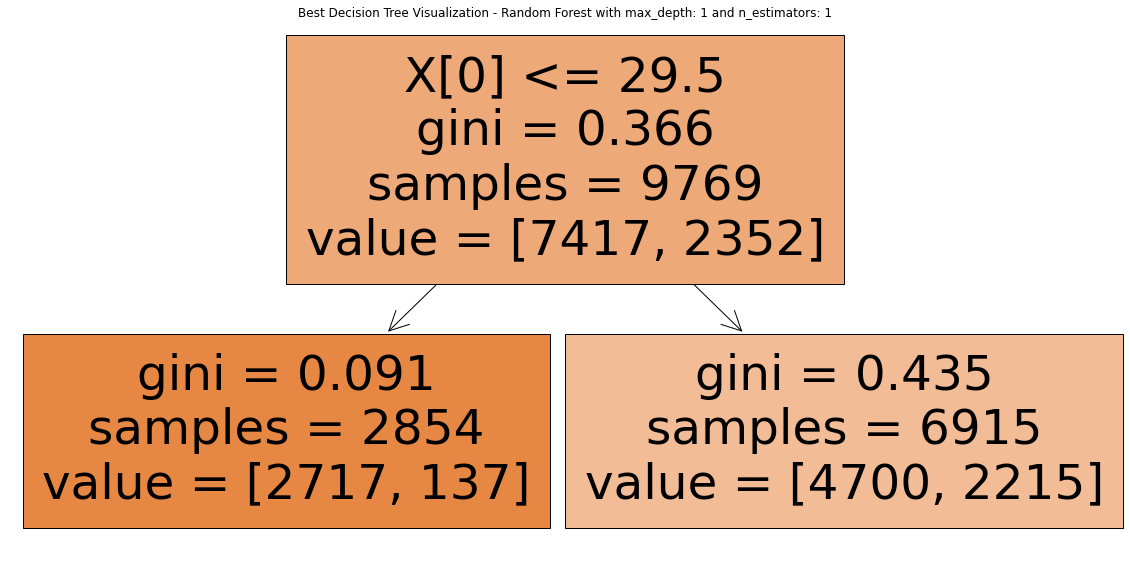

In [16]:
# Verifying results by testing on remaining 20% data

# AdaBoost
base_classifier_ada = DecisionTreeClassifier(max_depth=best_ada_max_depth, random_state=random_state)
ada_classifier = AdaBoostClassifier(base_classifier_ada, n_estimators=best_ada_n_estimators, random_state=random_state)

ada_classifier = ada_classifier.fit(X_verify, y_verify)

y_pred_ada = ada_classifier.predict(X_verify)
accuracy_ada = accuracy_score(y_verify, y_pred_ada)
        
# Random Forest
rf_classifier = RandomForestClassifier(max_depth=best_rf_max_depth, n_estimators=best_rf_n_estimators, random_state=random_state)

rf_classifier = rf_classifier.fit(X_verify, y_verify)

y_pred_rf = rf_classifier.predict(X_verify)
accuracy_rf = accuracy_score(y_verify, y_pred_rf)

# Print results of best classifiers on verify data
print(f"AdaBoost accuracy: {accuracy_ada}\nRandomForest accuracy: {accuracy_rf}")
createROC(ada_classifier, rf_classifier, X_verify, y_verify)
createConfusionMatrix(y_verify, y_pred_ada, "AdaBoost", best_ada_max_depth, best_ada_n_estimators)
createConfusionMatrix(y_verify, y_pred_rf, "RandomForest", best_rf_max_depth, best_rf_n_estimators)
createDecisionTree(best_ada["classifier"], X_verify, y_verify, "AdaBoost")
createDecisionTree(best_rf["classifier"], X_verify, y_verify, "RandomForest")